In [45]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score
import xgboost as xgb
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline 

import pickle 

In [59]:
#carga del data set
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

In [60]:
df_train.head()

,path,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,z3,v3,x4,y4,z4,v4,x5,y5,z5,v5,x6,y6,z6,v6,x7,y7,z7,v7,x8,y8,z8,v8,x9,y9,z9,v9,x10,y10,z10,v10,x11,y11,z11,v11,x12,y12,z12,v12,x13,y13,z13,v13,x14,y14,z14,v14,x15,y15,z15,v15,x16,y16,z16,v16,x17,y17,z17,v17,x18,y18,z18,v18,x19,y19,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21,x22,y22,z22,v22,x23,y23,z23,v23,x24,y24,z24,v24,x25,y25,z25,v25,x26,y26,z26,v26,x27,y27,z27,v27,x28,y28,z28,v28,x29,y29,z29,v29,x30,y30,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Data\yoga_poses\train\Perro cabeza abajo\00000...,Perro cabeza abajo,0.426634,0.713943,-0.093915,0.996980,0.406371,0.710952,-0.145004,0.995039,0.404642,0.705721,-0.145550,0.995187,0.403245,0.700173,-0.145582,0.996736,0.407361,0.713045,-0.066857,0.995943,0.406534,0.709604,-0.067619,0.996878,0.405544,0.705767,-0.067821,0.996932,0.397799,0.657998,-0.289763,0.995591,0.397688,0.661569,0.067180,0.984686,0.441302,0.680605,-0.132316,0.988370,0.443813,0.684566,-0.032971,0.979309,0.430128,0.541324,-0.411461,0.999418,0.420804,0.530271,0.244902,0.994476,0.295531,0.713143,-0.662684,0.807553,0.299490,0.684566,0.275319,0.004048,0.156769,0.832786,-0.658594,0.768096,0.169500,0.799292,-0.033680,0.018399,0.116211,0.845959,-0.736393,0.705281,0.131736,0.809997,-0.066215,0.051530,0.104663,0.840052,-0.701638,0.671956,0.123480,0.813077,-0.127637,0.051562,0.119414,0.834914,-0.645051,0.577953,0.138351,0.804884,-0.073649,0.046428,0.631639,0.153670,-0.235412,0.998014,0.627181,0.160588,0.235076,0.997835,0.780855,0.480424,-0.084527,0.152061,0.777706,0.474437,0.274662,0.000923,0.902936,0.791097,0.005890,0.293736,0.883568,0.774605,0.453087,0.004247,0.946747,0.831583,-0.001967,0.536292,0.922088,0.814234,0.462778,0.020427,0.818725,0.854511,-0.212055,0.495209,0.806473,0.842906,0.325521,0.014819
1,Data\yoga_poses\train\Perro cabeza abajo\00000...,Perro cabeza abajo,0.367439,0.701348,-0.064974,0.999359,0.344818,0.692954,-0.116565,0.998689,0.343960,0.688882,-0.117033,0.998799,0.343456,0.684917,-0.117154,0.999194,0.346122,0.693237,-0.038666,0.998963,0.345946,0.689218,-0.039329,0.999202,0.345716,0.685359,-0.039471,0.999190,0.347180,0.647548,-0.268901,0.999232,0.346570,0.648551,0.086979,0.996387,0.386050,0.681242,-0.106414,0.998166,0.388263,0.684136,-0.006935,0.996780,0.404927,0.573720,-0.423879,0.999836,0.397716,0.543994,0.287939,0.998293,0.296775,0.752163,-0.641457,0.964023,0.302848,0.731568,0.324563,0.014799,0.163178,0.877126,-0.598856,0.913950,0.187149,0.861478,0.030597,0.041532,0.122502,0.890610,-0.679382,0.873736,0.146142,0.874506,0.009752,0.107640,0.115867,0.878676,-0.638609,0.851363,0.140161,0.868956,-0.054054,0.106363,0.131136,0.872077,-0.582363,0.784031,0.149369,0.864356,-0.008698,0.103359,0.624629,0.231267,-0.248043,0.998512,0.615257,0.223419,0.247787,0.998560,0.743966,0.528361,-0.145725,0.538154,0.751443,0.512453,0.294423,0.003246,0.871816,0.808257,-0.030743,0.559986,0.863741,0.793697,0.469886,0.013477,0.918380,0.864599,-0.035555,0.761024,0.905884,0.849085,0.479400,0.047465,0.775690,0.888351,-0.233529,0.685562,0.772919,0.878565,0.341431,0.034671
2,Data\yoga_poses\train\Perro cabeza abajo\00000...,Perro cabeza abajo,0.404704,0.680010,-0.110441,0.997819,0.374355,0.689220,-0.164776,0.996114,0.370303,0.683596,-0.165300,0.996603,0.367025,0.678338,-0.165273,0.997175,0.377102,0.692253,-0.087095,0.997183,0.374879,0.688663,-0.087887,0.998136,0.372576,0.684629,-0.088105,0.997943,0.356153,0.643277,-0.312650,0.997946,0.357400,0.643781,0.045093,0.993948,0.416260,0.646711,-0.147422,0.992474,0.418367,0.650089,-0.047763,0.988754,0.382177,0.521623,-0.437398,0.999490,0.380931,0.506092,0.256943,0.996321,0.259737,0.686023,-0.739730,0.911399,0.277195,0.649996,0.325115,0.007938,0.132779,0.843996,-0.794732,0.885603,0.169747,0.771849,0.019628,0.057922,0.090706,0.852861,-0.891063,0.856429,0.137978,0.772771,-0.008456,0.165506,0.086039,0.843470,-0.847247,0.836573,0.133130,0.773816,-0.075919,0.168734,0.102468,0.839400,-0.779308,0.761147,0.144708,0.776527,-0.021594,0.151882,0.670520,0.21

In [61]:
df_test.head()

,path,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,z3,v3,x4,y4,z4,v4,x5,y5,z5,v5,x6,y6,z6,v6,x7,y7,z7,v7,x8,y8,z8,v8,x9,y9,z9,v9,x10,y10,z10,v10,x11,y11,z11,v11,x12,y12,z12,v12,x13,y13,z13,v13,x14,y14,z14,v14,x15,y15,z15,v15,x16,y16,z16,v16,x17,y17,z17,v17,x18,y18,z18,v18,x19,y19,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21,x22,y22,z22,v22,x23,y23,z23,v23,x24,y24,z24,v24,x25,y25,z25,v25,x26,y26,z26,v26,x27,y27,z27,v27,x28,y28,z28,v28,x29,y29,z29,v29,x30,y30,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Data\yoga_poses\test\Perro cabeza abajo\000000...,Perro cabeza abajo,0.518547,0.742486,-0.094060,0.996826,0.496344,0.767326,-0.141868,0.993987,0.491603,0.764322,-0.142329,0.994749,0.487705,0.761558,-0.142291,0.995876,0.497760,0.769539,-0.070137,0.994870,0.494446,0.768190,-0.070785,0.996387,0.491257,0.766586,-0.070965,0.996055,0.464756,0.733044,-0.274690,0.994456,0.467820,0.734771,0.055713,0.979834,0.516789,0.703582,-0.127743,0.983265,0.518324,0.705959,-0.035545,0.970845,0.461043,0.605404,-0.368176,0.999378,0.461837,0.599707,0.223358,0.995873,0.365080,0.789879,-0.620478,0.889424,0.381610,0.760837,0.285112,0.005770,0.250795,0.917339,-0.643876,0.846327,0.273205,0.869615,0.018480,0.037715,0.215631,0.922490,-0.716922,0.785039,0.243570,0.872432,-0.005798,0.101808,0.206967,0.917332,-0.681050,0.756621,0.240825,0.870403,-0.063119,0.103497,0.217875,0.914012,-0.629704,0.660222,0.249176,0.867209,-0.017055,0.091928,0.664986,0.262072,-0.210094,0.995513,0.658360,0.270610,0.209726,0.995701,0.780536,0.553592,-0.105180,0.194927,0.768786,0.551847,0.276718,0.001248,0.877868,0.861872,-0.003497,0.276063,0.854547,0.832264,0.458604,0.005286,0.908118,0.905886,-0.007864,0.529747,0.886180,0.879122,0.469257,0.025927,0.789870,0.930098,-0.181524,0.459847,0.784383,0.905448,0.355095,0.016852
1,Data\yoga_poses\test\Perro cabeza abajo\000000...,Perro cabeza abajo,0.563640,0.780452,-0.096948,0.996388,0.582421,0.789499,-0.082015,0.984200,0.584537,0.786749,-0.082428,0.992731,0.586582,0.784095,-0.082436,0.984054,0.583027,0.787763,-0.133444,0.990485,0.585609,0.783903,-0.133915,0.997073,0.588463,0.779740,-0.134207,0.994764,0.598771,0.752657,-0.005041,0.991970,0.601898,0.744257,-0.239923,0.994550,0.559853,0.753044,-0.055259,0.972948,0.560884,0.751755,-0.127192,0.981138,0.580299,0.656671,0.092506,0.997294,0.586016,0.625990,-0.286213,0.999437,0.655258,0.781063,0.146853,0.023175,0.676624,0.780151,-0.512893,0.963939,0.755568,0.861556,-0.040847,0.049589,0.772818,0.872053,-0.527468,0.962518,0.776881,0.869569,-0.044840,0.175706,0.801973,0.886081,-0.591893,0.920815,0.782190,0.866654,-0.096728,0.187961,0.807805,0.878852,-0.553060,0.906374,0.775199,0.866800,-0.065049,0.171125,0.797946,0.875574,-0.517067,0.855159,0.417335,0.367488,0.141426,0.997110,0.410565,0.335577,-0.141828,0.998174,0.304285,0.598575,0.154036,0.004315,0.301318,0.594769,-0.125495,0.644371,0.182434,0.820896,0.194955,0.030505,0.177528,0.823754,-0.092375,0.797432,0.156658,0.851298,0.190189,0.119288,0.148792,0.857813,-0.095930,0.847636,0.248006,0.889221,0.081771,0.107267,0.242938,0.896715,-0.225382,0.755391
2,Data\yoga_poses\test\Perro cabeza abajo\000000...,Perro cabeza abajo,0.597804,0.735445,-0.015970,0.997167,0.624491,0.743747,0.008052,0.985165,0.627730,0.739510,0.007536,0.994317,0.631167,0.733486,0.007528,0.985495,0.623580,0.744055,-0.062284,0.990524,0.625964,0.740648,-0.062961,0.997650,0.628863,0.735308,-0.063337,0.994865,0.645427,0.698972,0.114927,0.994389,0.646220,0.699900,-0.207038,0.996232,0.593978,0.701241,0.041218,0.984244,0.594181,0.702192,-0.057479,0.986491,0.627579,0.573499,0.254353,0.998426,0.625988,0.596326,-0.278066,0.999742,0.720867,0.726949,0.364907,0.039619,0.721379,0.768053,-0.547723,0.990875,0.816072,0.835579,0.082298,0.257905,0.841693,0.914206,-0.512970,0.995360,0.849288,0.846929,0.081955,0.626545,0.878382,0.933258,-0.591696,0.989026,0.857278,0.848065,0.004673,0.651379,0.890446,0.924986,-0.533721,0.986798,0.842424,0.846491,0.046899,0.613964,0.877532,0.915851,-0.493673,0.976597,0.395390,0.276206

In [62]:
print('df_train shape: ', df_train.shape)
print('df_test shape: ',df_test.shape)

test_slip = round((df_test.shape[0]/(df_train.shape[0]+df_test.shape[0]))*100,-1)
train_split = round((df_train.shape[0]/(df_train.shape[0]+df_test.shape[0]))*100,-1)

print(f'Split Train/Test: {int(train_split)}%-{int(test_slip)}%')


df_train shape:  (582, 134)
df_test shape:  (265, 134)
Split Train/Test: 70%-30%


In [63]:
X_train = df_train.drop(columns=['path', 'class'])
y_train = df_train['class']

X_test = df_test.drop(columns=['path', 'class'])
y_test = df_test['class']

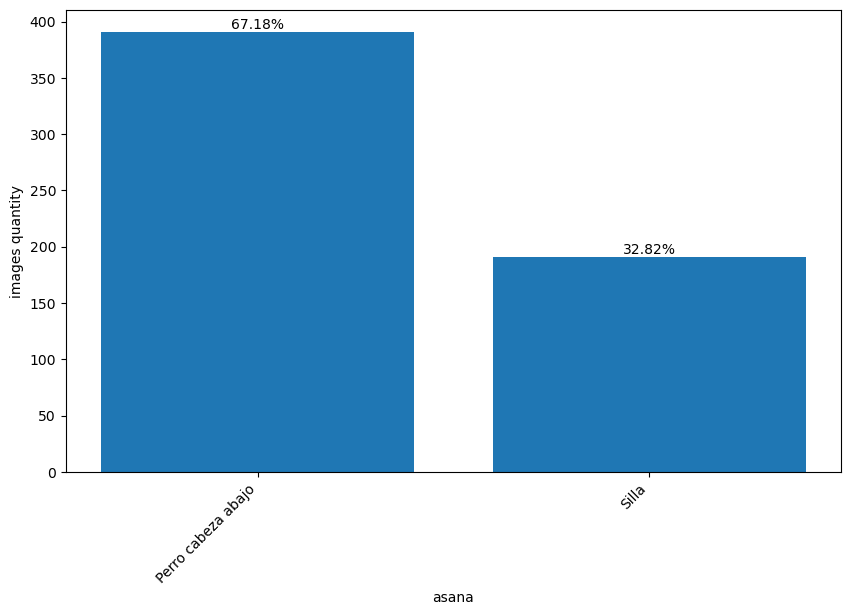

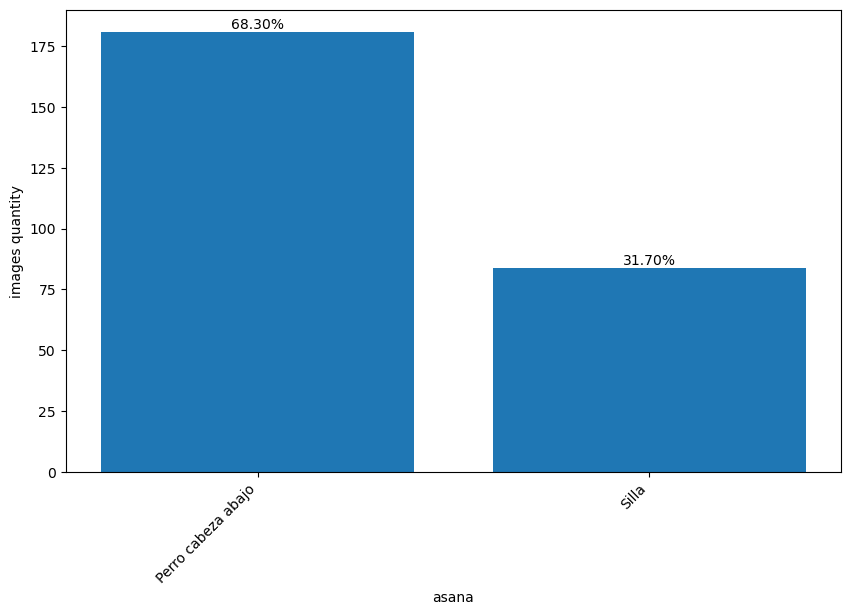

In [64]:
# Calcular counts y porcentajes
for i in (y_train, y_test): 
    valid_categories = i
    category_counts = valid_categories.value_counts()
    total_count = len(valid_categories)
    category_percentages = (category_counts / total_count) * 100

    # Grafico
    plt.figure(figsize=(10, 6))
    bars = plt.bar(category_counts.index, category_counts)
    plt.xlabel("asana")
    plt.ylabel("images quantity")

    # Agregar porcentajes sobre las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        category = category_counts.index[i]
        if category in category_percentages:
            percentage = category_percentages[category]
            plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.2f}%", ha="center", va="bottom")

    plt.xticks(rotation=45, ha="right")
    plt.show()

In [65]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [66]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [67]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 1.0
rc 1.0
rf 1.0
gb 1.0


In [68]:
with open('yoga_pose_detection.pkl', 'wb') as f:
    pickle.dump(fit_models['lr'], f)